# Linear Model
<h3>Tasks</h3>
a. After the initial fitting, evaluate the fit by noting the R2 and p values of the fit.<br> b. Change the model so that it line is forced through Wayne Gretzky. Note the R2 and p values of the fit. This will another line or if you prefer another plot.<br>c. Now add the data for another player Patrick Kane (he is a current player). You need to get the data for form online sources. <br>Create a new chart with this addition and force the line through Kane but not Gretzky. Note R2 and p values of the fit. <br> d. Make all the model go through (0,0) and create new models. <br>Note R2 and p values of the fit. <br>e. Create a table of model names (reference), R2 and p values of the fit. Interpret your results. 

Load the libraries

In [1]:
library(ggplot2)
library(dplyr)
library(doBy)
library(readxl)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'readxl' was built under R version 3.3.3"

Load the data

In [2]:
Nhl.data=read_excel("NHLTop100.xlsx")
head(Nhl.data)
summary(Nhl.data)

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


      Rank           Player              Team               Pos           
 Min.   :  1.00   Length:100         Length:100         Length:100        
 1st Qu.: 25.75   Class :character   Class :character   Class :character  
 Median : 50.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 50.50                                                           
 3rd Qu.: 75.25                                                           
 Max.   :100.00                                                           
                                                                          
 1st NHL Season     Last NHL Season          GP             G        
 Length:100         Length:100         Min.   : 657   Min.   :185.0  
 Class :character   Class :character   1st Qu.:1108   1st Qu.:391.0  
 Mode  :character   Mode  :character   Median :1246   Median :470.5  
                                       Mean   :1261   Mean   :475.4  
                                       3rd Qu.:140

In [3]:
Nhl.data.gap=select(Nhl.data,Player,G,A,GP)#filter required column
length(unique(Nhl.data$Player))#check if all the observation is unique


[1] 100

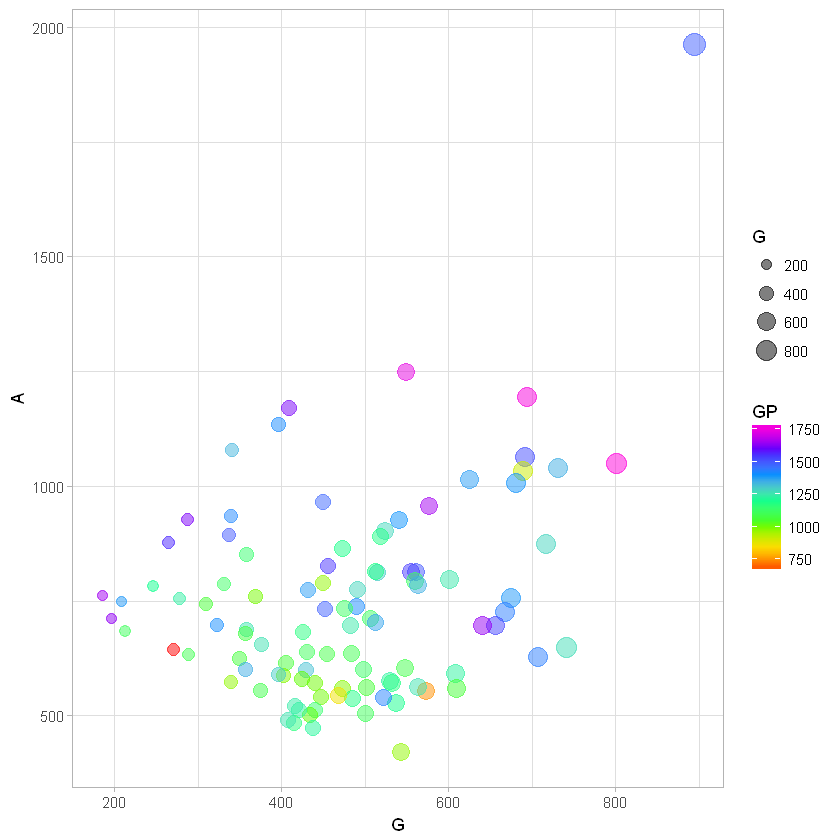

In [4]:
p1<-ggplot(Nhl.data.gap, aes(x = G, y = A, size = G),fill="#FFFFFF")+ theme_light()
p2<-p1+geom_point(aes(color = GP),alpha = 0.5)+scale_colour_gradientn(colours = rainbow(7))+
    scale_size_area()
p2

Fitting a linear model
  

In [49]:
Nhl.fit1 <- lm(A ~ G, data = Nhl.data.gap)
Nhl.fit.predict1<-predict(Nhl.fit1)

Creating an empty dataframe

In [47]:
fit.summary=data.frame(Model.Name=character(),R2=double(),
                       p2=character(),Passing.through.origin=character(),stringsAsFactors=FALSE)

fit.summary

Model.Name,R2,p2,Passing.through.origin


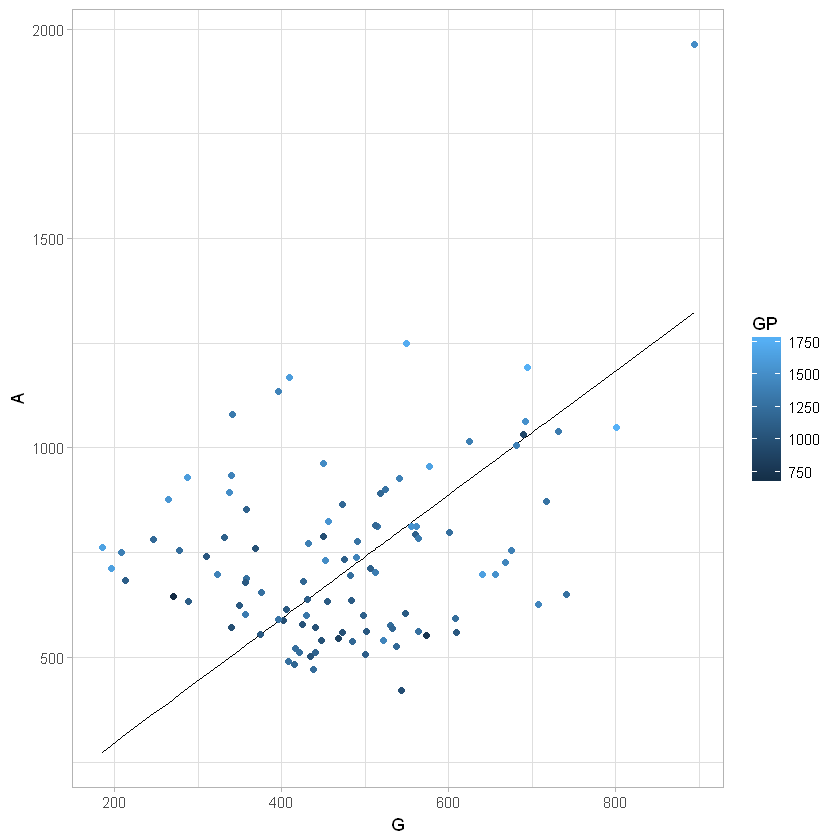

In [48]:
p3=ggplot(Nhl.data.gap, aes(x = G, y = A))+geom_line(aes(y = Nhl.fit.predict1))+
    geom_point(aes(color = GP))+ theme_light()
p3

In [8]:
summary(Nhl.fit1)


Call:
lm(formula = A ~ G, data = Nhl.data.gap)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


<h1>a. After the initial fitting, evaluate the fit by noting the R2 and p values of the fit. 
<h2>Fit 1:
<h2> Adjusted R-squared:  0.09913 <br>
p-value: 0.0008317

# Suprisingly the default fit is giving R2 of 0.09

### Recording the data in a dataframe


In [9]:
# fit.summary=rbind.data.frame(fit.summary, c("Default",0.09913,"0.0008317","No"),stringsAsFactors=FALSE)
x=data.frame(Model.Name="Fit.Default.1",R2=0.09913,
                       p2="0.0008317",Passing.through.origin="No",stringsAsFactors=FALSE)
fit.summary=rbind.data.frame(fit.summary,x)
fit.summary

Model.Name,R2,p2,Passing.through.origin
Fit.Default.1,0.09913,0.0008317,No


# Change the model so that it line is forced through Wayne Gretzky. Note the R2 and p values of the fit. This will another line or if you prefer another plot. 

<h2>Fit 2: Passing through Wayne Gretzky <br></h2>

For Wayne Gretzky G=894,A=1963<br>

In [10]:
fit.wayne1=(lm(I(A-1963)~I(G-894), data = Nhl.data.gap))
summary(fit.wayne1)


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = Nhl.data.gap)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1003.4220    66.4463 -15.101  < 2e-16 ***
I(G - 894)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


From the summary its clear that the y intercept is -1003 and the slope of our model is 0.5202

Plotting the fit

1 
-1003.422

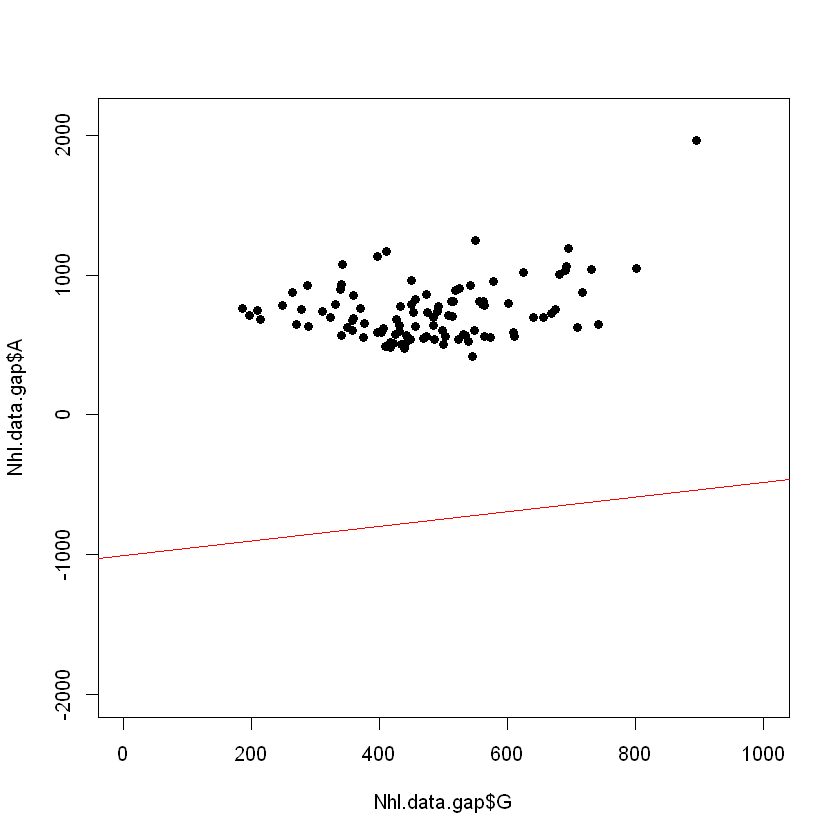

In [44]:
plot(Nhl.data.gap$G,Nhl.data.gap$A,pch=19,xlim=c(0,1000), ylim=c(-2000,2100))
abline(coef(fit.wayne1), col='red')


As we can see above that the line is shifted below. 

Noting the observations from above

Slope=0.5202 | Intercept = -1003

substituting y=1963,x=894,m=0.5202 in eqation y=mx+c, we get

c=1497.9

#### Making a different model with data from above analysis

In [45]:
fit.wayne2=(lm(I(A+1003)~I(G), data = Nhl.data.gap))
summary(fit.wayne2)
fit.wayne2
predict(fit.wayne2,newdata=list(G=894))


Call:
lm(formula = I(A + 1003) ~ I(G), data = Nhl.data.gap)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1497.5135    74.6410  20.063  < 2e-16 ***
I(G)           0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317



Call:
lm(formula = I(A + 1003) ~ I(G), data = Nhl.data.gap)

Coefficients:
(Intercept)         I(G)  
  1497.5135       0.5202  


1 
1962.578

### We can see as predicted the Intercept is 1497 and slope is 0.5202, thus this model is the same model which passes through Wayne and has same slope

Plotting the model

[1] "**********************************************************************"
[1] "Red line is line with LM forced to pass through Wayne"
[1] "**********************************************************************"


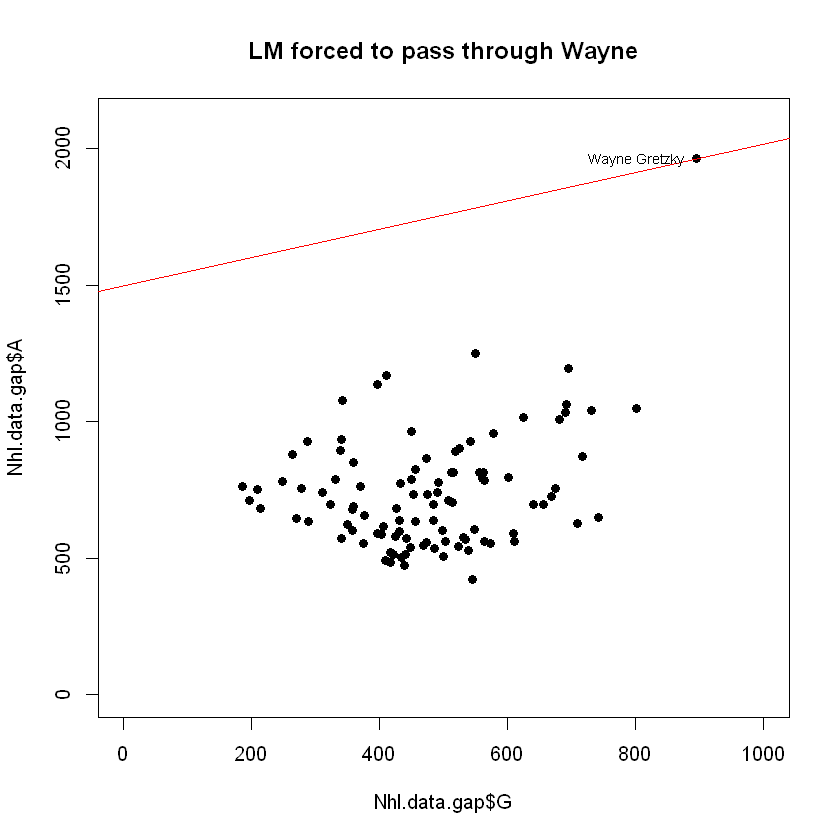

In [13]:
plot(Nhl.data.gap$G,Nhl.data.gap$A,pch=19,xlim=c(0,1000), ylim=c(0,2100),main = "LM forced to pass through Wayne")
abline(coef(fit.wayne2), col='red')
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)
print("**********************************************************************")
print("Red line is line with LM forced to pass through Wayne")
print("**********************************************************************")

Recording the data

In [14]:
x=data.frame(Model.Name="Fit.Wayne.1",R2=0.09913,
                       p2="0.1082",Passing.through.origin="No",stringsAsFactors=FALSE)
fit.summary=rbind.data.frame(fit.summary,x)
fit.summary

Model.Name,R2,p2,Passing.through.origin
Fit.Default.1,0.09913,0.0008317,No
Fit.Wayne.1,0.09913,0.1082,No


## Attempt 2 :

Using the prediction to pass the line through wayne and making wayne cordinate as origin

In [15]:
Nhl.fit2 <- (lm(I(A-1963)~I(G-894)+0, data = Nhl.data.gap))
Nhl.fit.predict2<-predict(Nhl.fit2)
summary(Nhl.fit2)


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = Nhl.data.gap)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


I(G - 894) 
  2.684662

[1] "**********************************************************************"
[1] "Blue line is default LM"
[1] "Red line is line with LM forced to pass through Wayne"
[1] "**********************************************************************"


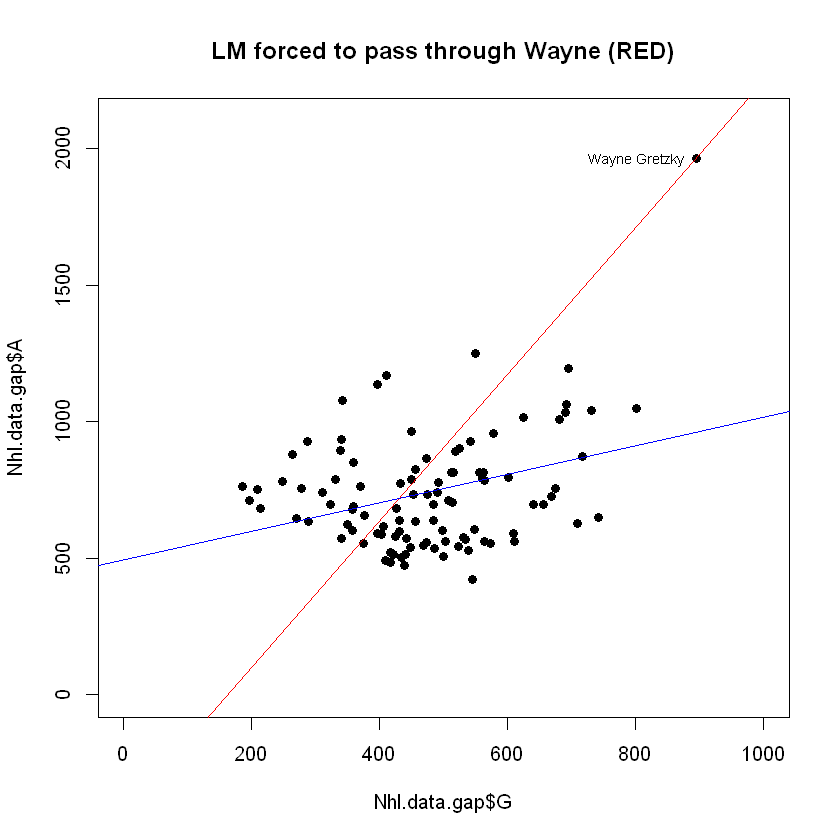

In [16]:
plot(Nhl.data.gap$G,Nhl.data.gap$A,pch=19,xlim=c(0,1000), ylim=c(0,2100),,main = "LM forced to pass through Wayne (RED)")
abline(predict(Nhl.fit2, newdata = list(G=0))+1963, coef(Nhl.fit2), col='red')
abline(Nhl.fit1, col="blue")#default LM
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)
coef(Nhl.fit2)

print("**********************************************************************")
print("Blue line is default LM")
print("Red line is line with LM forced to pass through Wayne")
print("**********************************************************************")

Predicted value of origin actual

In [17]:
new.df <- data.frame(G=c(0))
predict(Nhl.fit2, new.df)

1 
-2400.088

Predicted value of wayn actual:

In [18]:
new.df <- data.frame(G=c(894))
predict(Nhl.fit2, new.df)

1 
0

Its 0 since wayne is now shifted to origin

In [19]:
summary(Nhl.fit2)


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = Nhl.data.gap)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16



Adjusted R-squared:  0.9082 <br>
p-value: < 2.2e-16


Recording the data

In [20]:
x=data.frame(Model.Name="Fit.Wayne.2",R2=0.9082,
                       p2="< 2.2e-16",Passing.through.origin="No",stringsAsFactors=FALSE)

fit.summary=rbind.data.frame(fit.summary,x)
fit.summary

Model.Name,R2,p2,Passing.through.origin
Fit.Default.1,0.09913,0.0008317,No
Fit.Wayne.1,0.09913,0.1082,No
Fit.Wayne.2,0.90820,< 2.2e-16,No


# c. Now add the data for another player Patrick Kane (he is a current player). You need to get the data for form online sources. Create a new chart with this addition and force the line through Kane but not Gretzky. Note R2 and p values of the fit. 

Data for Patrick Kane<br>

https://www.nhl.com/player/patrick-kane-8474141

GP=728<br>
G=282 <br>
A=458 <br>


Adding Patrick Kane

In [21]:
Nhl.data.gap.PK=rbind(Nhl.data.gap, c("Patrick Kane",282,458,728)) # Adding Patrick Kane
nrow(Nhl.data.gap.PK)

Nhl.data.gap.PK=D <- transform(Nhl.data.gap.PK, G = as.numeric(G), 
                                A = as.numeric(A), 
                                GP=as.numeric(GP))

[1] 101

Following the same code as in Wayne

In [22]:
fit.Patrick1=(lm(I(A-458)~I(G-282), data = Nhl.data.gap.PK))
summary(fit.Patrick1)



Call:
lm(formula = I(A - 458) ~ I(G - 282), data = Nhl.data.gap.PK)

Residuals:
   Min     1Q Median     3Q    Max 
-356.0 -175.1   -8.9  126.2  997.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 177.9002    35.2102   5.053    2e-06 ***
I(G - 282)    0.5385     0.1492   3.609 0.000484 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1163,	Adjusted R-squared:  0.1073 
F-statistic: 13.03 on 1 and 99 DF,  p-value: 0.000484


### We can see that the R2 = 0.1073 and pvalue0.000484. Also  (Intercept) 177.9002 I(G - 282)    0.5385 

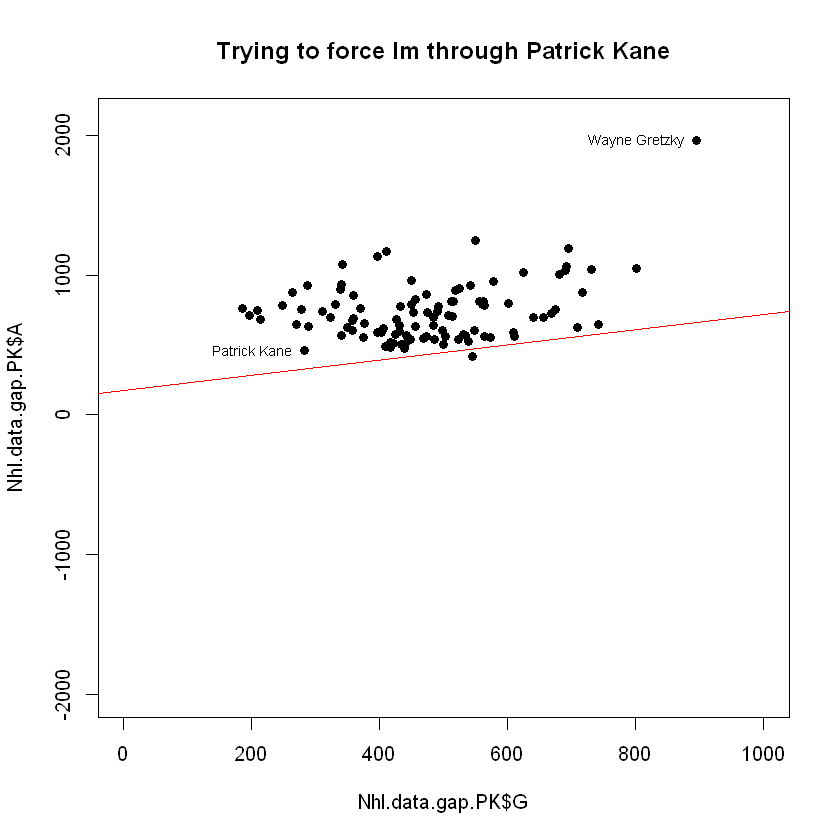

In [23]:

plot(Nhl.data.gap.PK$G,Nhl.data.gap.PK$A,pch=19,xlim=c(0,1000), ylim=c(-2000,2100),main="Trying to force lm through Patrick Kane")
abline(coef(fit.Patrick1), col='red')
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)
text(x=282, y=458, labels="Patrick Kane",cex= 0.7,pos=2)

Noting down the (Intercept) 177.9002 and slope I(G - 282)    0.5385

We make a different LM with same slope but passing through Patrick

In [24]:


fit.Patrick2=(lm(I(A-177.9)~I(G), data = Nhl.data.gap.PK)) # subtracting the (Intercept) 177.9002 
fit.Patrick2
summary(fit.Patrick2)



Call:
lm(formula = I(A - 177.9) ~ I(G), data = Nhl.data.gap.PK)

Coefficients:
(Intercept)         I(G)  
   306.1517       0.5385  



Call:
lm(formula = I(A - 177.9) ~ I(G), data = Nhl.data.gap.PK)

Residuals:
   Min     1Q Median     3Q    Max 
-356.0 -175.1   -8.9  126.2  997.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 306.1517    73.5812   4.161 6.77e-05 ***
I(G)          0.5385     0.1492   3.609 0.000484 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.1163,	Adjusted R-squared:  0.1073 
F-statistic: 13.03 on 1 and 99 DF,  p-value: 0.000484


### We can see that the slope of this model is unchanged and it passes through Patrick Kane. Also it is to be noted that the R2 = 0.1073 and pvalue0.000484 remains unchanged. This this is the same model passing through Patrick Kane

Plotting the model

[1] "**********************************************************************"
[1] "Red line is line with LM forced to pass through Patrick"
[1] "**********************************************************************"


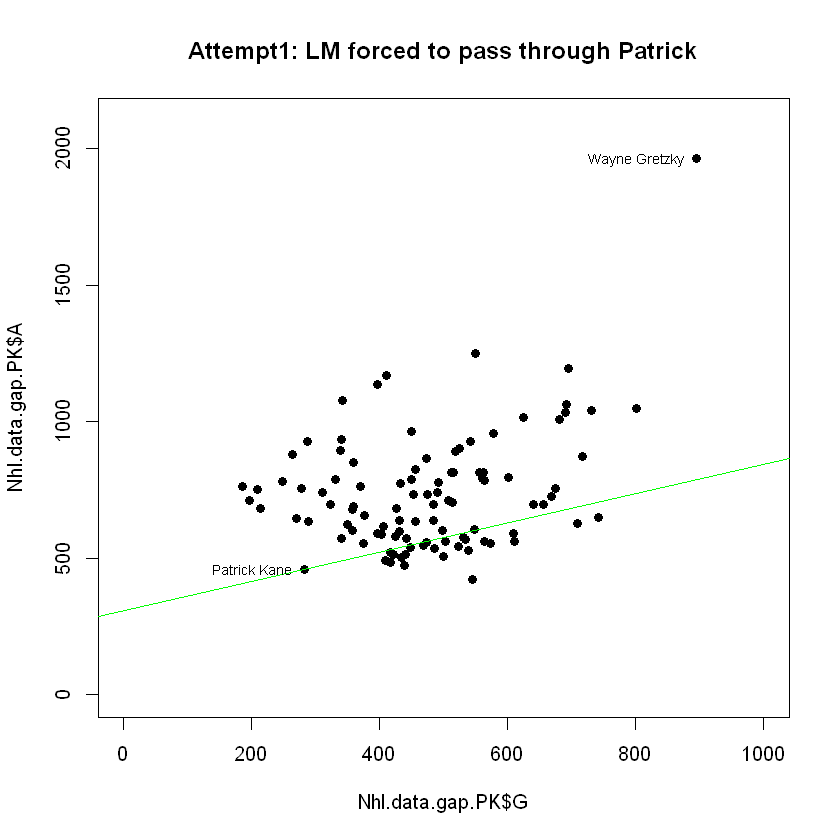

In [25]:

plot(Nhl.data.gap.PK$G,Nhl.data.gap.PK$A,pch=19,xlim=c(0,1000), ylim=c(0,2100),main = "Attempt1: LM forced to pass through Patrick")
abline(coef(fit.Patrick2), col='green')
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)
text(x=282, y=458, labels="Patrick Kane",cex= 0.7,pos=2)
print("**********************************************************************")
print("Red line is line with LM forced to pass through Patrick")
print("**********************************************************************")

Recording the data

In [26]:
x=data.frame(Model.Name="Fit.Patrick.1",R2=0.1073,
                       p2="0.000484",Passing.through.origin="No",stringsAsFactors=FALSE)

fit.summary=rbind.data.frame(fit.summary,x)
fit.summary

Model.Name,R2,p2,Passing.through.origin
Fit.Default.1,0.09913,0.0008317,No
Fit.Wayne.1,0.09913,0.1082,No
Fit.Wayne.2,0.90820,< 2.2e-16,No
Fit.Patrick.1,0.10730,0.000484,No


# Attemp2 : 

Using predictive method to pass Lm through Patrick Kane

In [27]:
Nhl.fit3 <- (lm(I(A-458)~I(G-282)+0, data = Nhl.data.gap.PK))
Nhl.fit.predict3<-predict(Nhl.fit3)

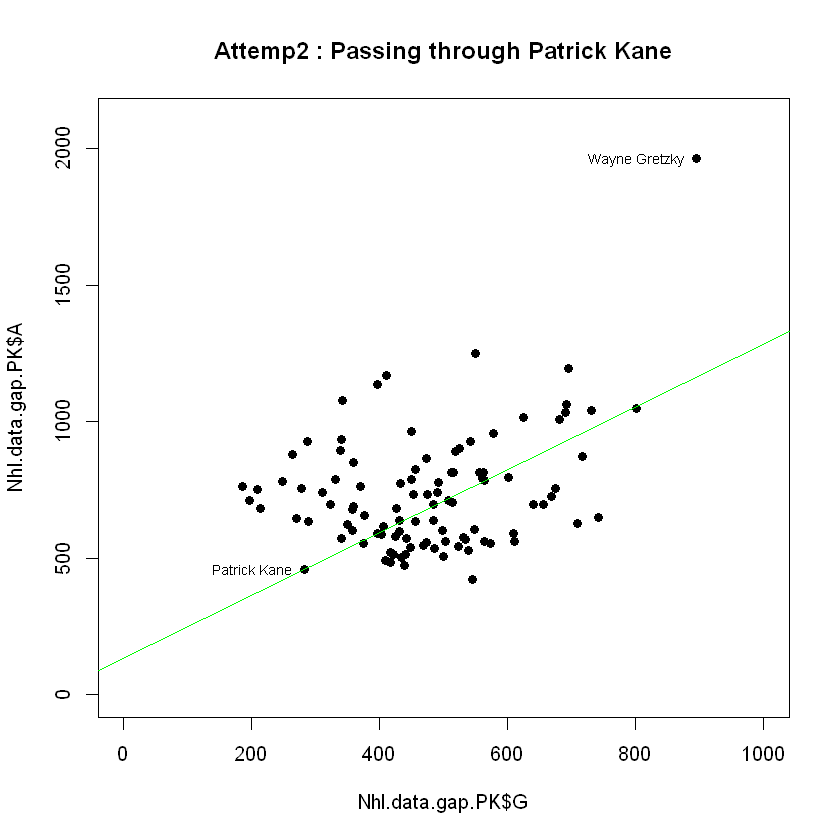

In [28]:
plot(Nhl.data.gap.PK$G,Nhl.data.gap.PK$A,pch=19,xlim=c(0,1000), ylim=c(0,2100),main="Attemp2 : Passing through Patrick Kane")

# abline(predict(Nhl.fit2, newdata = list(G=0))+1963, coef(Nhl.fit2), col='red')
# # abline(Nhl.fit1, col="blue")
abline(predict(Nhl.fit3, newdata = list(G=0))+458, coef(Nhl.fit3), col='green')

text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)
text(x=282, y=458, labels="Patrick Kane",cex= 0.7,pos=2)

In [29]:
summary(Nhl.fit3)


Call:
lm(formula = I(A - 458) ~ I(G - 282) + 0, data = Nhl.data.gap.PK)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.35 -112.92   39.85  167.95  801.09 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 282)   1.1502     0.0973   11.82   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5829,	Adjusted R-squared:  0.5787 
F-statistic: 139.7 on 1 and 100 DF,  p-value: < 2.2e-16


<h2>Fit 3: Passing through Patrick Kane <br></h2>
Adjusted R-squared:  0.5787 <br>
p-value: < 2.2e-16

Recording the data

In [30]:
x=data.frame(Model.Name="Fit.Patrick.2",R2=0.5787,
                       p2="< 2.2e-16",Passing.through.origin="No",stringsAsFactors=FALSE)

fit.summary=rbind.data.frame(fit.summary,x)
fit.summary

Model.Name,R2,p2,Passing.through.origin
Fit.Default.1,0.09913,0.0008317,No
Fit.Wayne.1,0.09913,0.1082,No
Fit.Wayne.2,0.90820,< 2.2e-16,No
Fit.Patrick.1,0.10730,0.000484,No
Fit.Patrick.2,0.57870,< 2.2e-16,No


# d. Make all the model go through (0,0) and create new models. Note R2 and p values of the fit. 

Making default model pass through origin



In [31]:
default.v1 <- (lm(A ~ G-1, data = Nhl.data.gap))
default.v1.predict1<-predict(default.v1 )
summary(default.v1  )



Call:
lm(formula = A ~ G - 1, data = Nhl.data.gap)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


It can be observed that intercept part is 0 .


Adjusted R-squared:  0.8972 <br>
p-value: < 2.2e-16

Plotting the Model

[1] "**********************************************************************"
[1] "Blue line is default LM"
[1] "Red line is  line with LM forced to pass through Origin"
[1] "**********************************************************************"


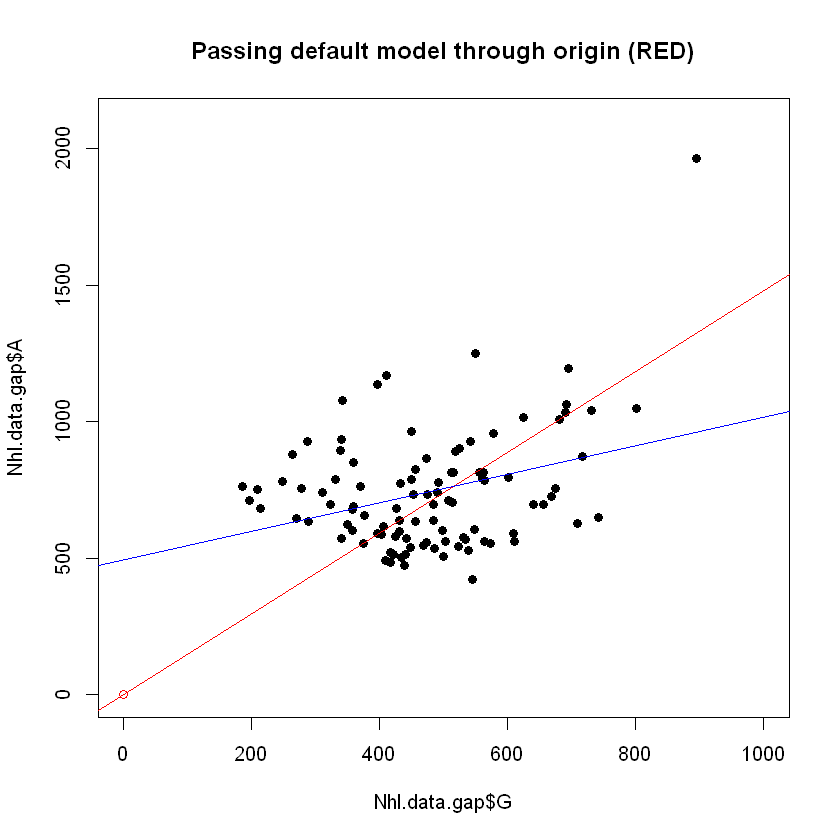

In [32]:
print("**********************************************************************")
print("Blue line is default LM")
print("Red line is  line with LM forced to pass through Origin")
print("**********************************************************************")
plot(Nhl.data.gap$G,Nhl.data.gap$A,pch=19,xlim=c(0,1000), ylim=c(0,2100),main="Passing default model through origin (RED)")

# abline(predict(Nhl.fit2, newdata = list(G=0))+1963, coef(Nhl.fit2), col='red')
# abline(Nhl.fit1, col="blue")
abline(a=0,b=1.48033 ,col="red")
abline(Nhl.fit1,col="blue")
points(x=0,y=0, col = "red")

Recording the data

In [33]:
x=data.frame(Model.Name="Fit.Default.2",R2=0.8972 ,
                       p2="< 2.2e-16",Passing.through.origin="Yes",stringsAsFactors=FALSE)

fit.summary=rbind.data.frame(fit.summary,x)
fit.summary

Model.Name,R2,p2,Passing.through.origin
Fit.Default.1,0.09913,0.0008317,No
Fit.Wayne.1,0.09913,0.1082,No
Fit.Wayne.2,0.90820,< 2.2e-16,No
Fit.Patrick.1,0.10730,0.000484,No
Fit.Patrick.2,0.57870,< 2.2e-16,No
Fit.Default.2,0.89720,< 2.2e-16,Yes


Making model of Wayne Gretzky go through zero

In [34]:
fit.wayne3 <- (lm(I(A-1963)~I(G-894)+0, data = Nhl.data.gap))
summary(fit.wayne3)


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = Nhl.data.gap)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


# The slope is wrong. 

# using the equation y=mx+c<br>
<h1>c=0, m=(1963-0)/(894-0) gives m=2.19 while the above lm is giving slope= 2.6847

Plotting the LM

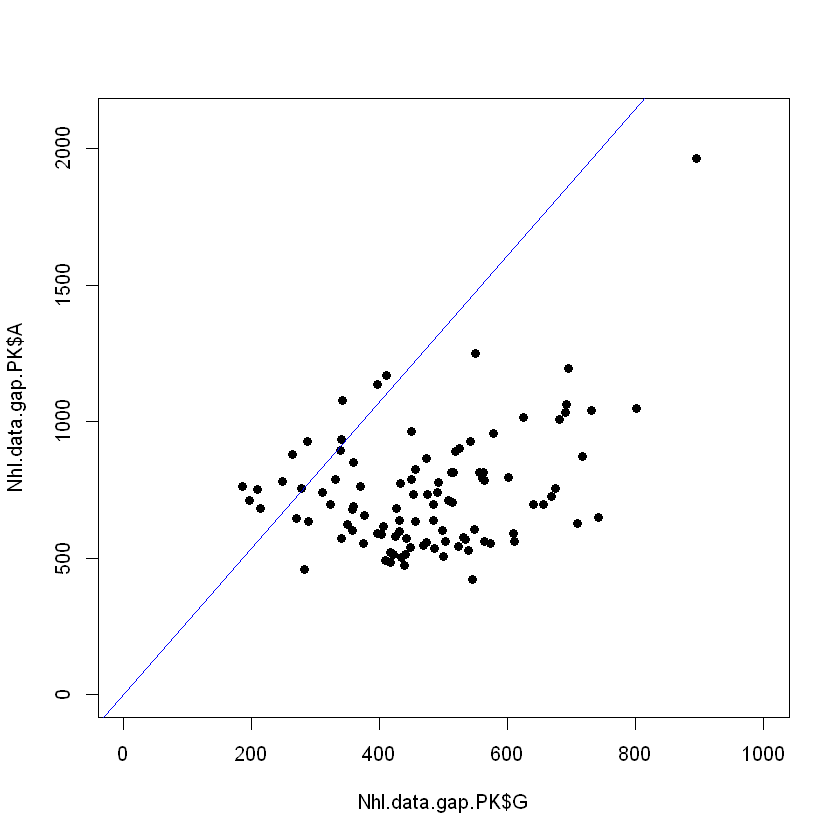

In [35]:
plot(Nhl.data.gap.PK$G,Nhl.data.gap.PK$A,pch=19,xlim=c(0,1000), ylim=c(0,2100))
abline(a=0,b=2.6847 ,col="blue")

## Modifying LM to have slope of 2.19

In [36]:
Nhl.fit5 <- (lm(A+368~G+0, data = Nhl.data.gap.PK))
Nhl.fit.predict5<-predict(Nhl.fit5)
summary(Nhl.fit5)


Call:
lm(formula = A + 368 ~ G + 0, data = Nhl.data.gap.PK)

Residuals:
    Min      1Q  Median      3Q     Max 
-610.13 -121.30   30.37  225.18  724.52 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G   2.1972     0.0637   34.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 315.7 on 100 degrees of freedom
Multiple R-squared:  0.9225,	Adjusted R-squared:  0.9217 
F-statistic:  1190 on 1 and 100 DF,  p-value: < 2.2e-16


# Using this LM we are getting the slope as expected with line passing through origin

Ploting the LM

[1] "**********************************************************************"
[1] "RED line is LM passing through Wayne"
[1] "Green line is LM passing through Wayne and passing through origin"
[1] "**********************************************************************"


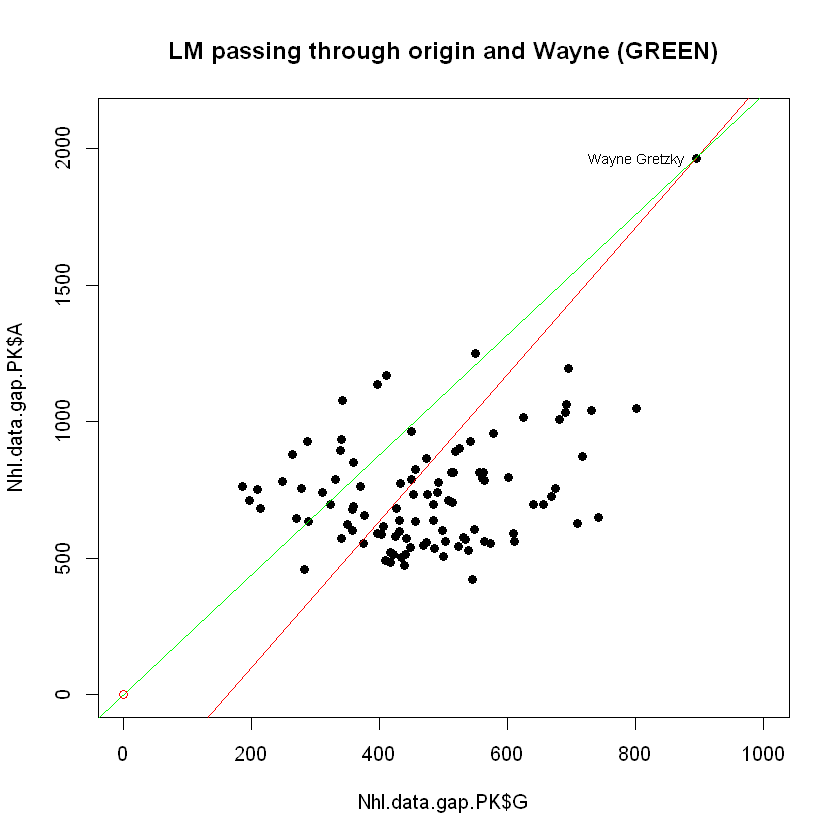

In [37]:
plot(Nhl.data.gap.PK$G,Nhl.data.gap.PK$A,pch=19,xlim=c(0,1000), ylim=c(0,2100),main="LM passing through origin and Wayne (GREEN)")
# abline(predict(Nhl.fit2, newdata= list(G=0))+1963, coef(Nhl.fit2), col='red')
abline(predict(Nhl.fit2, newdata = list(G=0))+1963, coef(Nhl.fit2), col='red')#original fir
abline(Nhl.fit5, col="green")#fit passing through origin
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)

points(x=0,y=0, col = "red")
print("**********************************************************************")
print("RED line is LM passing through Wayne")
print("Green line is LM passing through Wayne and passing through origin")
print("**********************************************************************")


<h2>Fit 5: Default(Red) and passing through origin(black)<br></h2>
Adjusted R-squared:  0.9217 <br>
p-value: < 2.2e-16


Recording the data

In [38]:
x=data.frame(Model.Name="Fit.Wayne.3",R2=0.9217 ,
                       p2="< 2.2e-16",Passing.through.origin="Yes",stringsAsFactors=FALSE)

fit.summary=rbind.data.frame(fit.summary,x)
fit.summary

Model.Name,R2,p2,Passing.through.origin
Fit.Default.1,0.09913,0.0008317,No
Fit.Wayne.1,0.09913,0.1082,No
Fit.Wayne.2,0.90820,< 2.2e-16,No
Fit.Patrick.1,0.10730,0.000484,No
Fit.Patrick.2,0.57870,< 2.2e-16,No
Fit.Default.2,0.89720,< 2.2e-16,Yes
Fit.Wayne.3,0.92170,< 2.2e-16,Yes


Making model of Patrick Kane pass through zero

In [39]:
fit.patrick3 <- (lm(I(A-458)~I(G-282)+0, data = Nhl.data.gap))
summary(fit.patrick3)


Call:
lm(formula = I(A - 458) ~ I(G - 282) + 0, data = Nhl.data.gap)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.35 -114.36   40.81  168.49  801.09 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 282)  1.15017    0.09779   11.76   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231.9 on 99 degrees of freedom
Multiple R-squared:  0.5829,	Adjusted R-squared:  0.5787 
F-statistic: 138.3 on 1 and 99 DF,  p-value: < 2.2e-16


# This slope is wrong

# using the equation y=mx+c<br>
<h1>c=0, m=(458-0)/(282-0) gives m=1.62 while the above lm is giving slope= 1.15

## Modifying LM to have slope of 1.62

[1] "**********************************************************************"
[1] "Blue line is LM passing through Patrick Kane"
[1] "Green line is LM passing through Patrick and passing through origin"
[1] "**********************************************************************"


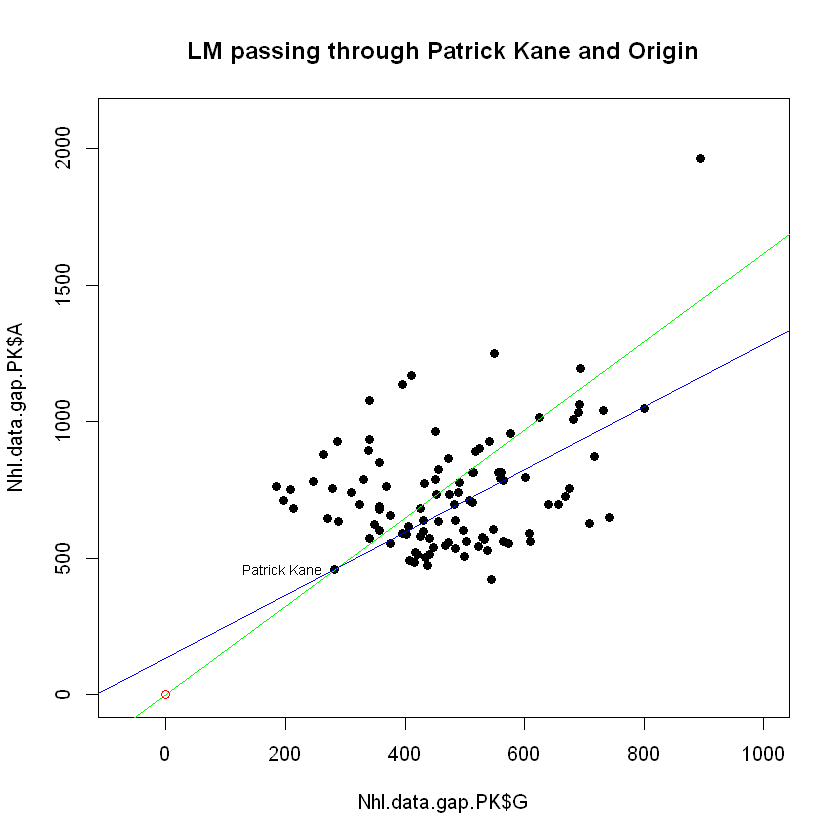

In [40]:
Nhl.fit6<- (lm(A+70~G+0, data = Nhl.data.gap.PK))
Nhl.fit.predict6<-predict(Nhl.fit6)
plot(Nhl.data.gap.PK$G,Nhl.data.gap.PK$A,pch=19,xlim=c(-70,1000), ylim=c(0,2100),main="LM passing through Patrick Kane and Origin")

abline(Nhl.fit6,col='green')#fit pasning through origin
abline(predict(Nhl.fit3, newdata = list(G=0))+458, coef(Nhl.fit3), col='blue')#original fit
text(x=282, y=458, labels="Patrick Kane",cex= 0.7,pos=2)
points(x=0,y=0, col = "red")
print("**********************************************************************")
print("Blue line is LM passing through Patrick Kane")
print("Green line is LM passing through Patrick and passing through origin")
print("**********************************************************************")
# coef(Nhl.fit1)
# summary(Nhl.fit1)

In [41]:
summary(Nhl.fit6)


Call:
lm(formula = A + 70 ~ G + 0, data = Nhl.data.gap.PK)

Residuals:
    Min      1Q  Median      3Q     Max 
-478.25 -130.81   13.99  170.12  597.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.61707    0.05206   31.06   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 258 on 100 degrees of freedom
Multiple R-squared:  0.9061,	Adjusted R-squared:  0.9051 
F-statistic: 964.8 on 1 and 100 DF,  p-value: < 2.2e-16


### Using this model we are getting the expected slope of 1.62 as derived from the eqaution


<h2>Fit 6: Default(blue) and Passing through origin(green) <br></h2>
Adjusted R-squared: 0.9051  <br>
p-value: < 2.2e-16

Recording the data

In [42]:
x=data.frame(Model.Name="Fit.Patrick.3",R2=0.9051 ,
                       p2="< 2.2e-16",Passing.through.origin="Yes",stringsAsFactors=FALSE)

fit.summary=rbind.data.frame(fit.summary,x)
fit.summary

Model.Name,R2,p2,Passing.through.origin
Fit.Default.1,0.09913,0.0008317,No
Fit.Wayne.1,0.09913,0.1082,No
Fit.Wayne.2,0.90820,< 2.2e-16,No
Fit.Patrick.1,0.10730,0.000484,No
Fit.Patrick.2,0.57870,< 2.2e-16,No
Fit.Default.2,0.89720,< 2.2e-16,Yes
Fit.Wayne.3,0.92170,< 2.2e-16,Yes
Fit.Patrick.3,0.90510,< 2.2e-16,Yes


In regression analysis, you'd like your regression model to have significant variables and to produce a high R-squared value. This low P value / high R2 combination indicates that changes in the predictors are related to changes in the response variable and that your model explains a lot of the response variability.<br>
Although inclusion of outliers should decrease the R2 value and disorganize the fit, but due to certain circumstances we are getting the least value for default LM and high value for LM with outliers. This case is not expected in general. In general Default LM should perform better.<br>
The same is the case with p2 value.

In [43]:
print("Summary of default lm line not passing through origin")
#     Min      1Q  Median      3Q     Max 
# -356.51 -158.59  -10.29  125.08 1003.42
summary(Nhl.fit1)
print("Summary of default lm line passing through origin")
summary(Nhl.fit8)
print("Summary of lm line passing through Wayne Gretzky and not passing through origin")
summary(Nhl.fit2)
print("Summary of lm line passing through Wayne Gretzky and passing through origin")
summary(Nhl.fit5)
print("Summary of lm line passing through Patrick Kane and not passing through origin")
summary(Nhl.fit3)
print("Summary of lm line passing through Patrick Kane and passing through origin")
summary(Nhl.fit6)

[1] "Summary of default lm line not passing through origin"



Call:
lm(formula = A ~ G, data = Nhl.data.gap)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


[1] "Summary of default lm line passing through origin"


ERROR: Error in summary(Nhl.fit8): object 'Nhl.fit8' not found
